<a href="https://colab.research.google.com/github/ldk7024/Deep_Learning_Study/blob/main/21_07_14_%ED%8C%A8%EC%85%98_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 패션 이미지 데이터 (10가지)를 분류하는 모델을 만들어보자!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [3]:
data = fashion_mnist.load_data()
data

4423680/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
X_train = data[0][0]  # X_train
y_train = data[0][1]  # y_train
X_test = data[1][0]  # X_test
y_test = data[1][1]  # y_test

In [5]:
print(X_train.shape)  # 데이터 개수, 가로 픽셀수, 세로 픽셀수
print(y_train.shape)
print(X_test.shape)   # 데이터 개수, 가로 픽셀수, 세로 픽셀수
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


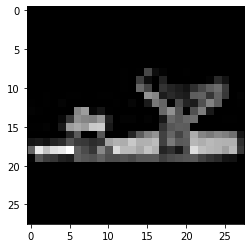

In [6]:
plt.imshow(X_train[59999], cmap ='gray')
# imshow: 이미지 데이터를 그림으로 출력해주는 명령
plt.show()

In [7]:
print(X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


### 직접 처음부터 모든 단계를 설정해보자!

In [8]:
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

In [9]:
y_train_one_hot.shape

(60000, 10)

In [11]:
# -1은 60000을 제외한 나머지 값들을 다 곱해서 일렬로 퍼줌
# X_train = X_train.reshape(60000, -1)
# X_test = X_test.reshape(10000, -1)

In [12]:
# X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [31]:
# 딥러닝을 위한 라이브러리를 임포트
from tensorflow.keras import Sequential  # 신경망의 뼈대를 구성
from tensorflow.keras.layers import Dense   # 신경망의 층을 구성
from tensorflow.keras.layers import Flatten # Flatten: 데이터를 1차원으로 자동으로 펴주는 모듈
from tensorflow.keras.layers import InputLayer,Dense

In [32]:
# 신경망의 뼈대를 설정
model = Sequential()

# Flatten 명령을 통해서 한번에 바로 2차원 이미지 데이터를 1차원으로 펴줌
model.add (Flatten(input_shape = (28,28)))
# 입력층 + 중간층
# input_dim : 데이터 특성의 개수
# activation: 활성화 함수를 설정 (들어온 자극 (데이터)에 대한 응답여부를 결정하는 함수)
model.add(Dense(500, activation="sigmoid"))

# 중간층
model.add(Dense(500,activation="sigmoid"))   # 하나의 층
model.add(Dense(300, activation="sigmoid"))   # 하나의 층
model.add(Dense(100, activation="sigmoid"))   # 하나의 층


# 출력층
model.add(Dense(10, activation="softmax"))   # 0~9까지의 정답레이블 (10개)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_12 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 824,410
Trainable params: 824,410
Non-trainable params: 0
________________________________________________

In [34]:
# 2. 학습/ 평가 방법 설정
model.compile(loss ="categorical_crossentropy",
               optimizer = 'Adam',            # Adam : 최근에 가장 많이 사용되는 성능이 높은 최적화 함수
               metrics = ["acc"]               # metrics: 평가 방법을 설정 (분류 문제이기 때문에 정확도(acc)를 확인)
               )

In [37]:
h = model.fit(X_train, 
              y_train_one_hot, 
              epochs=70, 
              verbose =2)
# verbose: 학습 결과의 출력 형태를 설정하는 명령 (0: 출력 x, 1: bar 형태 (디폴트 값), 2: bar가 없는 형태로 출력)

Epoch 1/70
1875/1875 - 4s - loss: 0.6977 - acc: 0.7325
Epoch 2/70
1875/1875 - 4s - loss: 0.6929 - acc: 0.7348
Epoch 3/70
1875/1875 - 4s - loss: 0.6616 - acc: 0.7446
Epoch 4/70
1875/1875 - 4s - loss: 0.6511 - acc: 0.7474
Epoch 5/70
1875/1875 - 4s - loss: 0.6417 - acc: 0.7516
Epoch 6/70
1875/1875 - 4s - loss: 0.6305 - acc: 0.7566
Epoch 7/70
1875/1875 - 4s - loss: 0.6392 - acc: 0.7504
Epoch 8/70
1875/1875 - 4s - loss: 0.6388 - acc: 0.7477
Epoch 9/70
1875/1875 - 4s - loss: 0.6253 - acc: 0.7576
Epoch 10/70
1875/1875 - 4s - loss: 0.6308 - acc: 0.7557
Epoch 11/70
1875/1875 - 4s - loss: 0.6276 - acc: 0.7556
Epoch 12/70
1875/1875 - 4s - loss: 0.6322 - acc: 0.7562
Epoch 13/70
1875/1875 - 4s - loss: 0.6194 - acc: 0.7600
Epoch 14/70
1875/1875 - 4s - loss: 0.6082 - acc: 0.7667
Epoch 15/70
1875/1875 - 4s - loss: 0.5929 - acc: 0.7730
Epoch 16/70
1875/1875 - 4s - loss: 0.5831 - acc: 0.7786
Epoch 17/70
1875/1875 - 4s - loss: 0.5902 - acc: 0.7721
Epoch 18/70
1875/1875 - 4s - loss: 0.5919 - acc: 0.7694
E

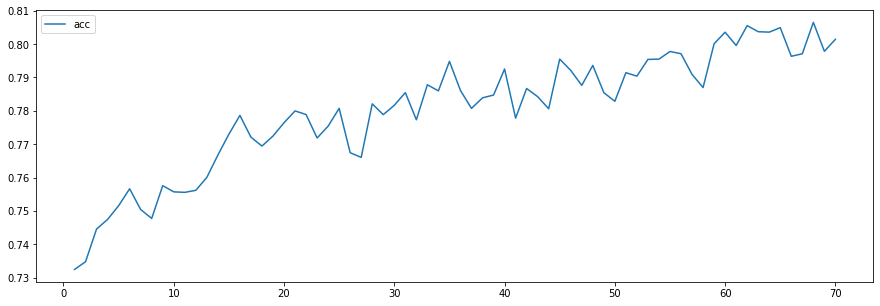

In [38]:
# 시각화

plt.figure(figsize=(15,5))

plt.plot(range(1,71),
         h.history['acc'],
         label ='acc'
         )

plt.legend()
plt.show()

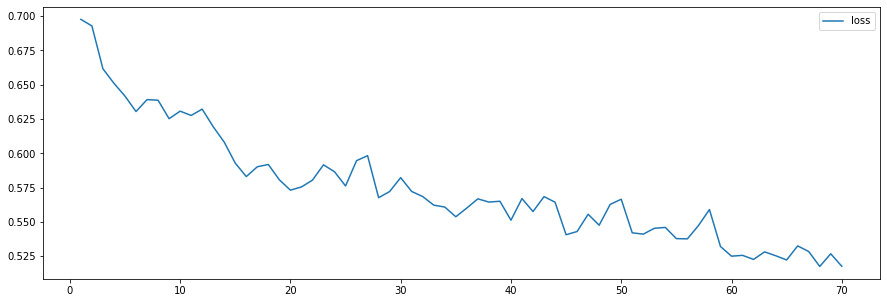

In [39]:
# loss 시각화

plt.figure(figsize=(15,5))

plt.plot(range(1,71),
         h.history['loss'],
         label ='loss'
         )

plt.legend()
plt.show()

In [40]:
# 모델 평가
model.evaluate(X_test,y_test_one_hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.5907 - acc: 0.7742


[0.5907405614852905, 0.7742000222206116]